In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [2]:
# Download stock data using yfinance

def download_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

In [3]:
# Preprocessing the data

def preprocess_data(data):
    # preprocessing the data for LSTM model
    # using ony the close price
    dataset = data['Close'].values
    dataset = dataset.reshape(-1,1)
    
    # scale the data
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)

    return scaled_data, scaler

In [12]:
# Creating the training dataset

def create_training_dataset(scaled_data, time_step=60):
    X_train, y_train = [], []
    for i in range(time_step, len(scaled_data)):
        X_train.append(scaled_data[i-time_step:i, 0])
        y_train.append(scaled_data[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshape for LSTM [samples, time steps, features]
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    return X_train, y_train

In [5]:
# Building the LSTM Model

def build_lstm_model(input_shape):
    model = Sequential()

    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))

    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(units=50))
    model.add(Dropout(0.2))

    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

In [15]:
# Making predictions

def make_predictions(model, data, scaler, time_step=60):
    # Prepare test data
    inputs = data[len(data) - len(test_data) - time_step:]
    inputs = inputs.reshape(-1, 1)
    inputs = scaler.transform(inputs)
    
    X_test = []
    for i in range(time_step, len(inputs)):
        X_test.append(inputs[i-time_step:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
    # Make predictions
    predicted_price = model.predict(X_test)
    predicted_price = scaler.inverse_transform(predicted_price)
    
    return predicted_price

In [8]:
# Evaluate model

def evaluate_model(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    mae = mean_absolute_error(actual, predicted)
    rmse = math.sqrt(mse)
    
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    
    return mse, mae, rmse

In [17]:
# Plot results

def plot_results(train, test, predictions):
    plt.figure(figsize=(16,8))
    plt.title('Stock Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Close price')

    # Plot training data
    plt.plot(train['Close'], label='Training Data')

    # Plot test data
    plt.plot(test['Close'], label='Actual Stock Price')

    # Plot predictions
    plt.plot(predictions, label='Predicted Stock Price')

    plt.legend()
    plt.show()

C:\Users\Jovita\AppData\Local\Temp\ipykernel_35272\1987845767.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Epoch 1/25



C:\Users\Jovita\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0207
Epoch 2/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0016
Epoch 3/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0011
Epoch 4/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0015
Epoch 5/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 9.5675e-04
Epoch 6/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0012
Epoch 7/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 9.3395e-04
Epoch 8/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 9.1977e-04
Epoch 9/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 8.8341e-04
Epoch 10/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 8.8508e-04
Epoch 11/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 7.4507e-04
Epoch 12/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 9.9848e-04
Epoch 13/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 7.8539e-04
Epoch 14/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 7.5966e-04
Epoch 15/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms

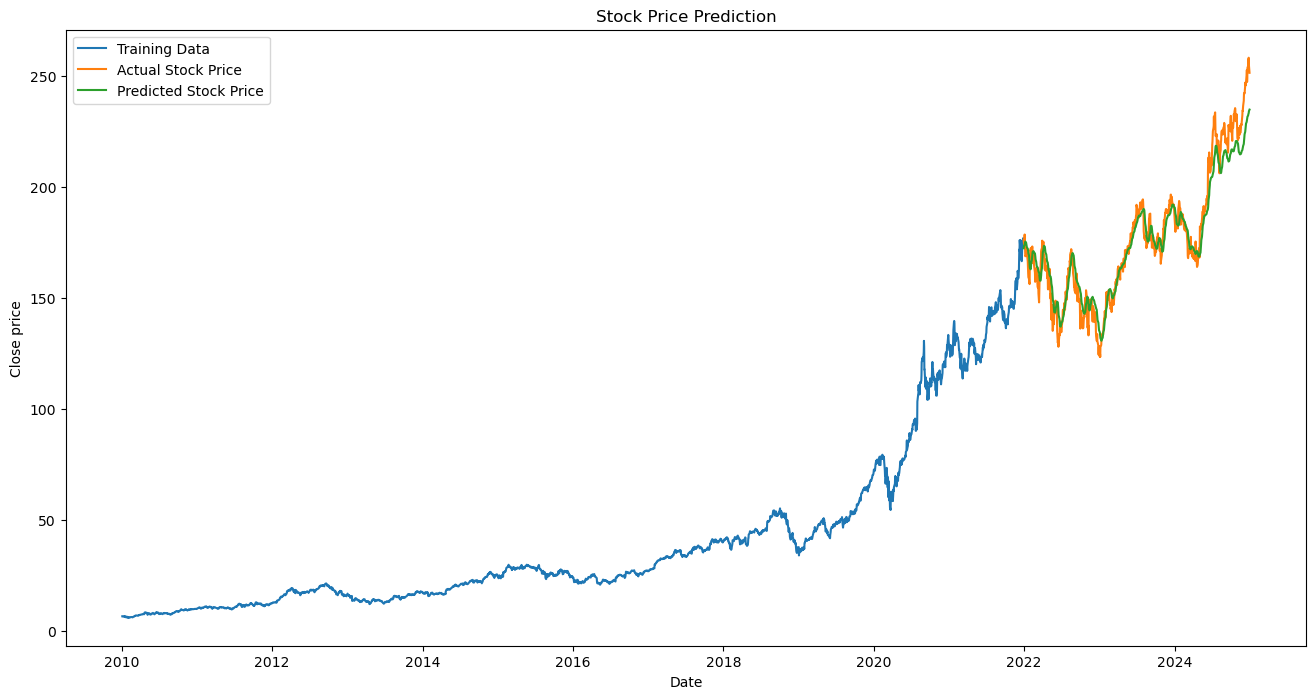

In [30]:
# Main execution

if __name__ == "__main__":
    # parameters
    TICKER = 'AAPL' # Apple stock
    START_DATE = '2010-01-01'
    END_DATE = '2024-12-31'
    TIME_STEP = 60 # Number of days to look back for prediction
    TRAIN_TEST_SPLIT = 0.8 # 80% training, 20% testing

    # Download data
    stock_data = download_stock_data(TICKER, START_DATE, END_DATE)

    # Split into training and testing
    train_size = int(len(stock_data)*TRAIN_TEST_SPLIT)
    train_data = stock_data[:train_size]
    test_data = stock_data[train_size:]

    # Preprocess data
    scaled_data, scaler = preprocess_data(train_data)

    # Create training dataset
    X_train, y_train = create_training_dataset(scaled_data, TIME_STEP)

    # Build and train model
    model = build_lstm_model((X_train.shape[1], 1))
    model.fit(X_train, y_train, epochs=25, batch_size=32)

    # Make predictions
    predicted_prices = make_predictions(model, stock_data['Close'].values, scaler, TIME_STEP)
    predicted_prices = pd.DataFrame(predicted_prices)
    predicted_prices.index = test_data.index

    #Evaluate
    evaluate_model(test_data['Close'].values[-len(predicted_prices):], predicted_prices)

    # Plot results
    plot_results(train_data, test_data, predicted_prices)

C:\Users\Jovita\AppData\Local\Temp\ipykernel_35272\1987845767.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Epoch 1/25



C:\Users\Jovita\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0112
Epoch 2/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0013
Epoch 3/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0012
Epoch 4/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 8.8924e-04
Epoch 5/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0012
Epoch 6/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 9.6733e-04
Epoch 7/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0011
Epoch 8/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 7.2525e-04
Epoch 9/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 9.4076e-04
Epoch 10/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 8.6958e-04
Epoch 11/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 8.6427e-04
Epoch 12/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 9.8929e-04
Epoch 13/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 6.4413e-04
Epoch 14/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 6.3117e-04
Epoch 15/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms

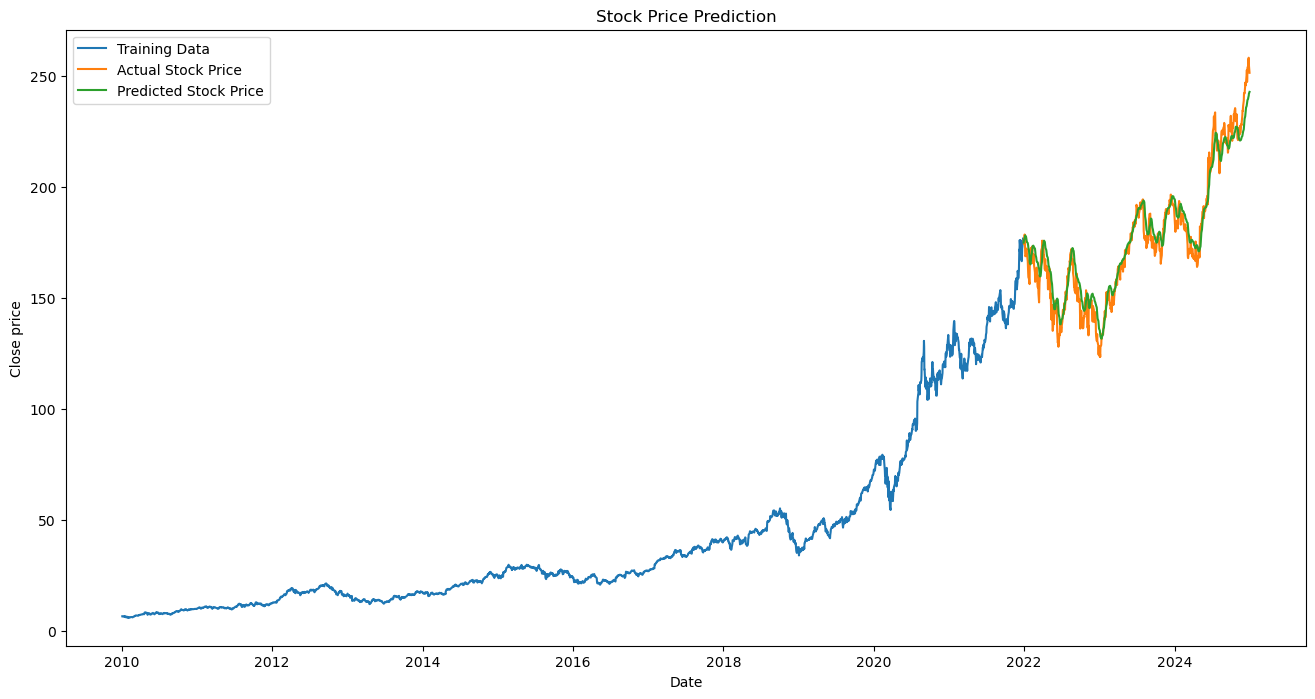

In [34]:
# Main execution

if __name__ == "__main__":
    # parameters
    TICKER = 'AAPL' # Apple stock
    START_DATE = '2010-01-01'
    END_DATE = '2024-12-31'
    TIME_STEP = 60 # Number of days to look back for prediction
    TRAIN_TEST_SPLIT = 0.8 # 80% training, 20% testing

    # Download data
    stock_data = download_stock_data(TICKER, START_DATE, END_DATE)

    # Split into training and testing
    train_size = int(len(stock_data)*TRAIN_TEST_SPLIT)
    train_data = stock_data[:train_size]
    test_data = stock_data[train_size:]

    # Preprocess data
    scaled_data, scaler = preprocess_data(train_data)

    # Create training dataset
    X_train, y_train = create_training_dataset(scaled_data, TIME_STEP)

    # Build and train model
    model = build_lstm_model((X_train.shape[1], 1))
    model.fit(X_train, y_train, epochs=25, batch_size=32)

    # Make predictions
    predicted_prices = make_predictions(model, stock_data['Close'].values, scaler, TIME_STEP)
    predicted_prices = pd.DataFrame(predicted_prices)
    predicted_prices.index = test_data.index

    #Evaluate
    evaluate_model(test_data['Close'].values[-len(predicted_prices):], predicted_prices)

    # Plot results
    plot_results(train_data, test_data, predicted_prices)

C:\Users\Jovita\AppData\Local\Temp\ipykernel_35272\1987845767.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\Jovita\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0175
Epoch 2/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0015
Epoch 3/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0015
Epoch 4/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0013
Epoch 5/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0012
Epoch 6/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 9.2857e-04
Epoch 7/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0011
Epoch 8/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 9.2281e-04
Epoch 9/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 8.8376e-04
Epoch 10/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 9.8701e-04
Epoch 11/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 7.3415e-04
Epoch 12/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 8.8565e-04
Epoch 13/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 7.1558e-04
Epoch 14/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 7.8673e-04
Epoch 15/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 

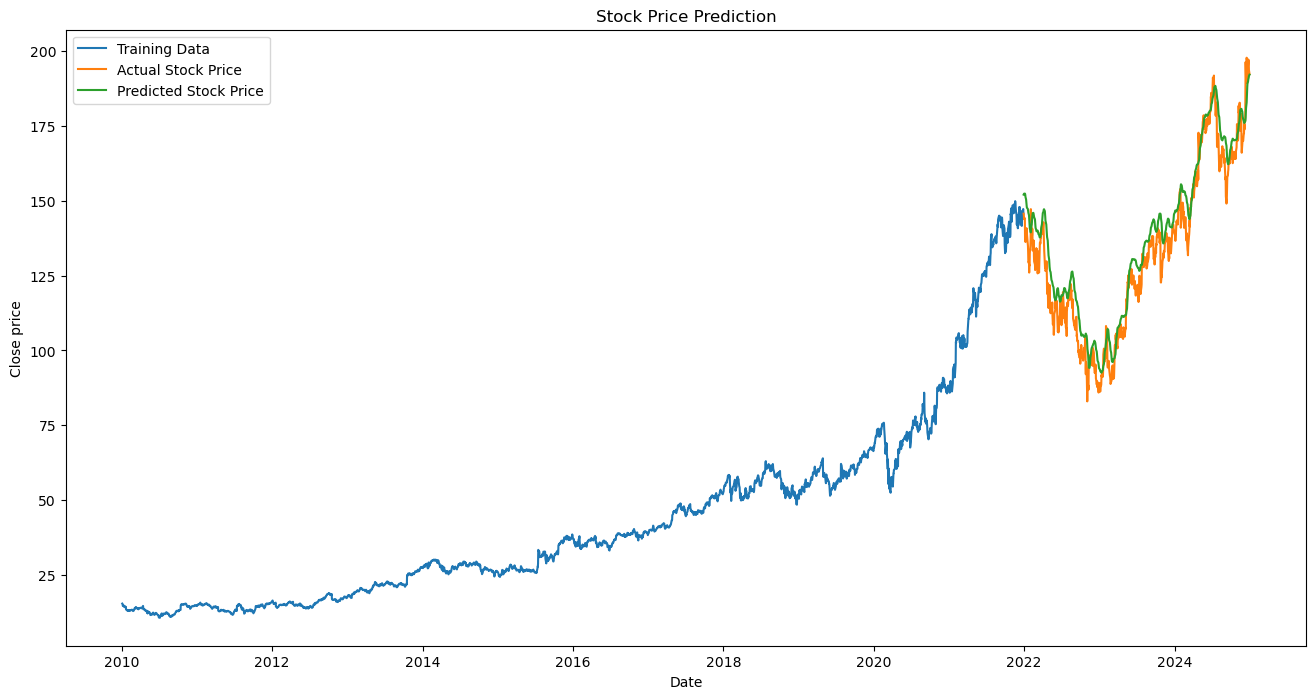

In [ ]:
# Main execution

if __name__ == "__main__":
    # parameters
    TICKER = 'GOOG' # Google stock
    START_DATE = '2010-01-01'
    END_DATE = '2024-12-31'
    TIME_STEP = 60 # Number of days to look back for prediction
    TRAIN_TEST_SPLIT = 0.8 # 80% training, 20% testing

    # Download data
    stock_data = download_stock_data(TICKER, START_DATE, END_DATE)

    # Split into training and testing
    train_size = int(len(stock_data)*TRAIN_TEST_SPLIT)
    train_data = stock_data[:train_size]
    test_data = stock_data[train_size:]

    # Preprocess data
    scaled_data, scaler = preprocess_data(train_data)

    # Create training dataset
    X_train, y_train = create_training_dataset(scaled_data, TIME_STEP)

    # Build and train model
    model = build_lstm_model((X_train.shape[1], 1))
    model.fit(X_train, y_train, epochs=25, batch_size=32)

    # Make predictions
    predicted_prices = make_predictions(model, stock_data['Close'].values, scaler, TIME_STEP)
    predicted_prices = pd.DataFrame(predicted_prices)
    predicted_prices.index = test_data.index

    #Evaluate
    evaluate_model(test_data['Close'].values[-len(predicted_prices):], predicted_prices)

    # Plot results
    plot_results(train_data, test_data, predicted_prices)

C:\Users\Jovita\AppData\Local\Temp\ipykernel_35272\1987845767.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Epoch 1/25



C:\Users\Jovita\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.0162
Epoch 2/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0025
Epoch 3/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0014
Epoch 4/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0014
Epoch 5/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 9.8331e-04
Epoch 6/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0013
Epoch 7/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0010
Epoch 8/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 8.8585e-04
Epoch 9/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0012
Epoch 10/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0010
Epoch 11/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 7.1142e-04
Epoch 12/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 8.1190e-04
Epoch 13/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 8.1565e-04
Epoch 14/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 6.9408e-04
Epoch 15/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss

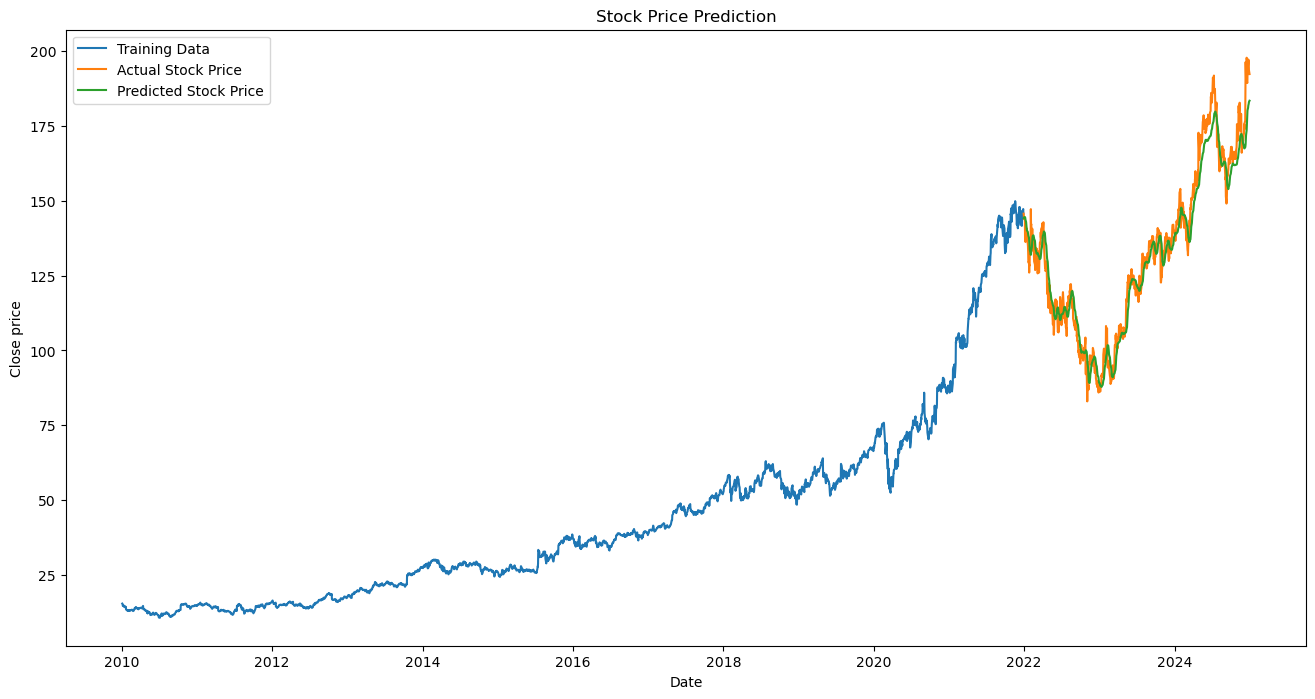

In [ ]:
# Main execution

if __name__ == "__main__":
    # parameters
    TICKER = 'GOOG' # Google stock
    START_DATE = '2010-01-01'
    END_DATE = '2024-12-31'
    TIME_STEP = 60 # Number of days to look back for prediction
    TRAIN_TEST_SPLIT = 0.8 # 80% training, 20% testing

    # Download data
    stock_data = download_stock_data(TICKER, START_DATE, END_DATE)

    # Split into training and testing
    train_size = int(len(stock_data)*TRAIN_TEST_SPLIT)
    train_data = stock_data[:train_size]
    test_data = stock_data[train_size:]

    # Preprocess data
    scaled_data, scaler = preprocess_data(train_data)

    # Create training dataset
    X_train, y_train = create_training_dataset(scaled_data, TIME_STEP)

    # Build and train model
    model = build_lstm_model((X_train.shape[1], 1))
    model.fit(X_train, y_train, epochs=25, batch_size=32)

    # Make predictions
    predicted_prices = make_predictions(model, stock_data['Close'].values, scaler, TIME_STEP)
    predicted_prices = pd.DataFrame(predicted_prices)
    predicted_prices.index = test_data.index

    #Evaluate
    evaluate_model(test_data['Close'].values[-len(predicted_prices):], predicted_prices)

    # Plot results
    plot_results(train_data, test_data, predicted_prices)